# Reading the pomodoros ods and plot

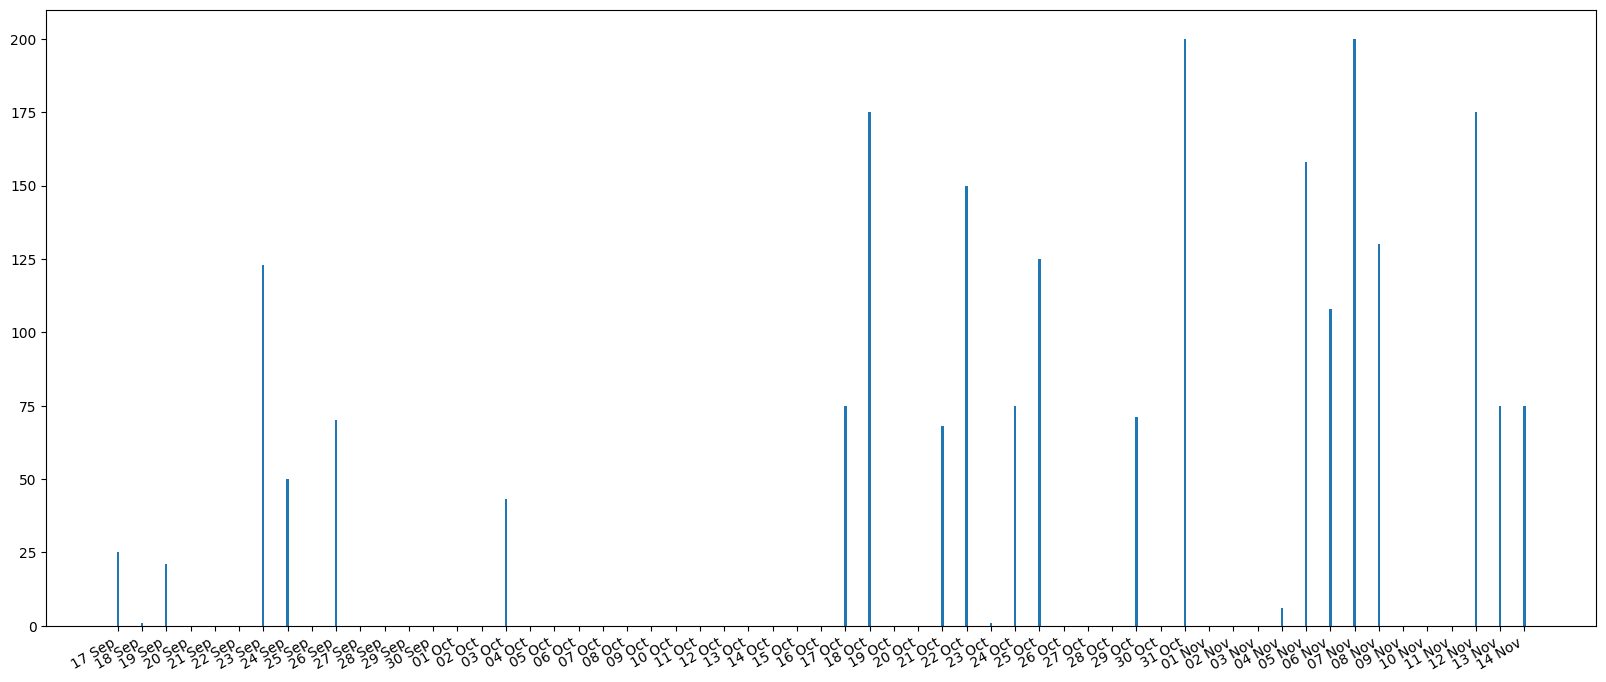

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd



def pomofocus_to_df(project_name="CALIPSO"):
    _my_df = pd.read_csv('../data/pomofocus.csv',header=0, index_col=0, parse_dates=True)
    # read_excel("pomodoros.ods", sheet_name="pomodoros",header=1, index_col=0, parse_dates=True)
    _my_df.fillna(0, inplace=True)
    # 1- Insert new column 'main_project' keeping first part of project name
    _my_df.insert(0, 'main_project',"")
    _my_df['main_project'] = _my_df.project.apply(lambda x: x.split()[0] if x!=0 else "")

    # 2- extract wanted project only and keep only two columns
    _my_df = _my_df[_my_df['main_project'] == project_name]
    _my_df = _my_df.minutes

    # 3- aggregate by day
    _my_df=_my_df.groupby(level=0).sum()
    # 4- add missing days reindex 
    day_first = _my_df.index[0]
    day_last = _my_df.index[-1]
    day_idx = pd.date_range(start=day_first, end=day_last, freq='D')
    _my_df=_my_df.reindex(day_idx, fill_value=0.0)
    return _my_df


if __name__ == "__main__":
    # for prj in ["CALIPSO", "PRO", "BHT", "PERSO"]:
    # for prj in ["CALIPSO"]:
    #     project_df = pomofocus_to_df(prj)
    #     print(f"{len(project_df)} lines for {prj}")
    #     print( project_df)
    #     # print(project_df.columns)
    
    my_df = pomofocus_to_df(prj)

    # import sys
    # sys.exit()
    
    
    fig, ax = plt.subplots(1, figsize=(20,8), sharex=True)
    
    
    # print(my_df)
    
    
    ax.tick_params(axis='x', labelsize=10, rotation=30)
    # date_format = '%a %d %b'
    # date_format = '%d-%m-%y'
    date_format = '%d %b'
    ax.xaxis.set_major_formatter(mdates.DateFormatter(date_format))
    ax.set_xticks(my_df.index)
    ax.set_xticklabels (ax.get_xticklabels(), ha="right")
    
    ax.bar(my_df.index, my_df, width=0.1)
